IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# Load data in Pandas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/timeseries_dataset/dailycases.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      328 non-null    object
 1   new_case  328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


# PreProcessing Dataset

In [ ]:
df.isnull().values.any()

False

In [ ]:
 df= df.dropna(axis=0)

In [ ]:
print('Shape of data', df.shape)
df.tail()

Shape of data (328, 2)


,date,new_case
323,20-03-2023,13
324,21-03-2023,4
325,22-03-2023,12
326,23-03-2023,17
327,24-03-2023,10


In [ ]:
df.head()

,date,new_case
0,01-05-2022,1
1,02-05-2022,1
2,03-05-2022,1
3,04-05-2022,1
4,05-05-2022,1


In [ ]:

#preprocessing
df.timestamp = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.index = df.timestamp
df.drop('date',axis = 1, inplace = True)

#looking at the first few rows
df.head()

,new_case
date,
2022-05-01,1
2022-05-02,1
2022-05-03,1
2022-05-04,1
2022-05-05,1


In [ ]:
df.shape

(328, 1)


# Plot your data 

<Axes: xlabel='date'>

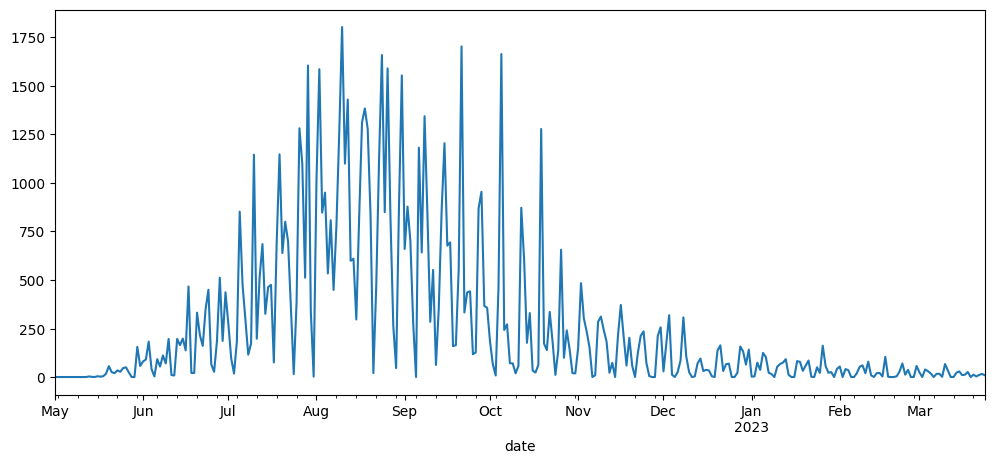

In [ ]:
df['new_case'].plot(figsize= (12,5))

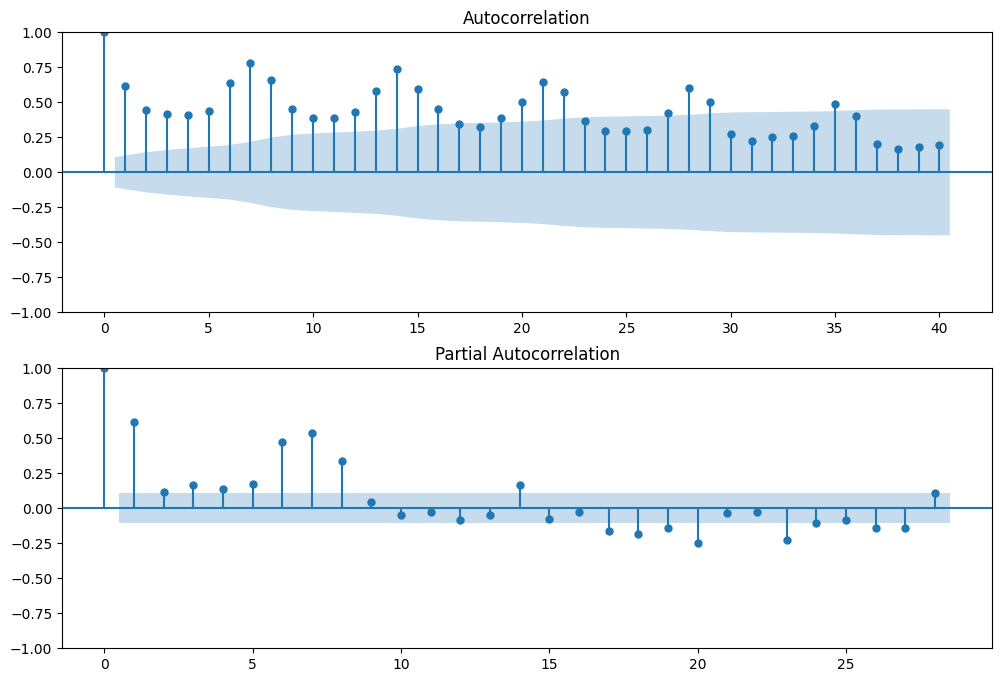

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['new_case'].iloc[2:],lags=40,ax=ax1)
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['new_case'].iloc[2:],lags=28,ax=ax1)

# check for stationary

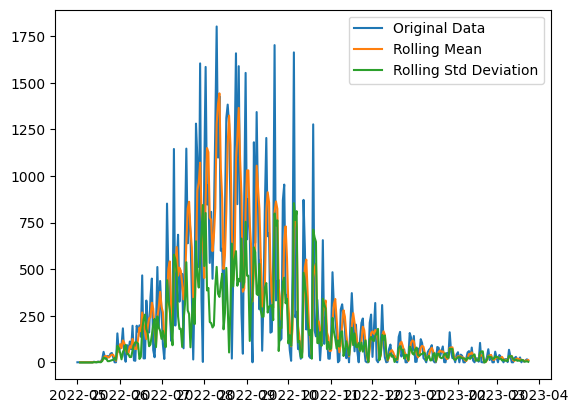

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample time series data
data = df['new_case']

# calculate rolling mean with window size of 3
rolling_mean = data.rolling(window=3).mean()

# calculate rolling standard deviation with window size of 3
rolling_std = data.rolling(window=3).std()

# plot the original data and rolling mean/standard deviation
plt.plot(data, label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Deviation')
plt.legend()

In [ ]:
result=adfuller (df['new_case'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is non- Stationary")

Test Statistic: -1.231708
p-value: 0.659809
Critical values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Failed to Reject Ho - Time Series is non- Stationary


**it shows data is non-stationary**

<Axes: xlabel='date'>

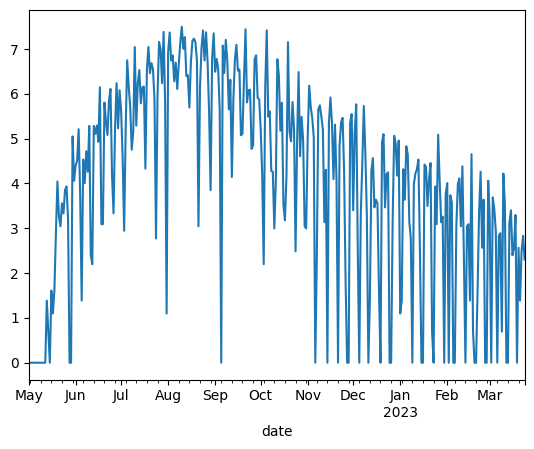

In [ ]:
# df['new_case'] = df['new_case']- df['new_case'].shift(1)
# df['new_case']=df['new_case'].dropna()
# df['new_case'].plot()
df['new_case'] =np.log(df['new_case'])
df['new_case']=df['new_case'].dropna()
df['new_case'].plot()

In [ ]:
result=adfuller (df['new_case'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is non- Stationary")

Test Statistic: -1.822916
p-value: 0.369145
Critical values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Failed to Reject Ho - Time Series is non- Stationary


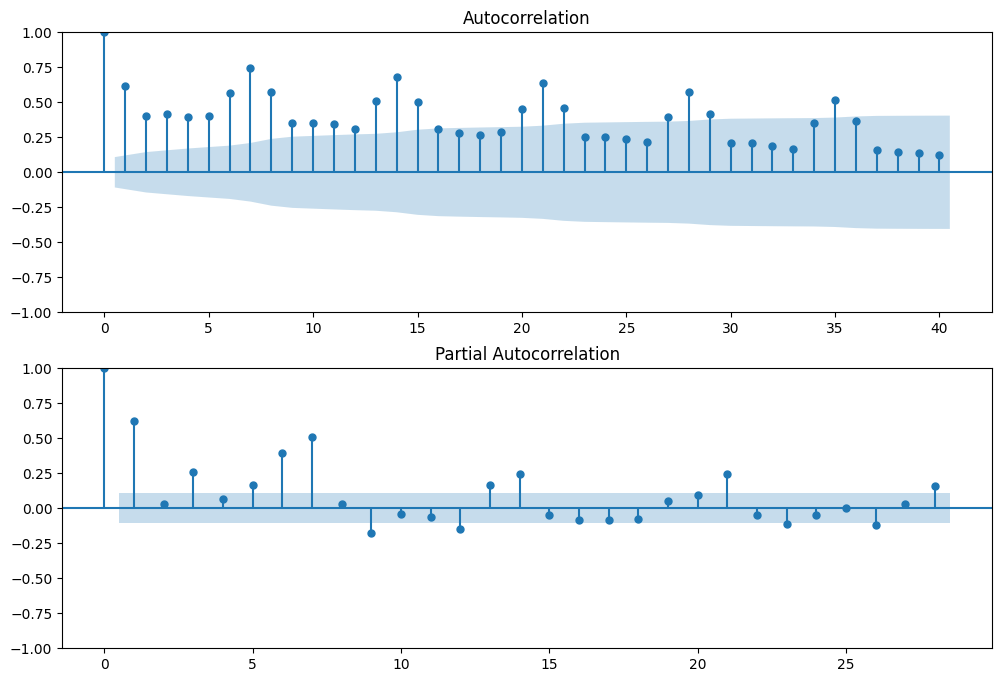

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['new_case'].iloc[2:],lags=40,ax=ax1)
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['new_case'].iloc[2:],lags=28,ax=ax1)

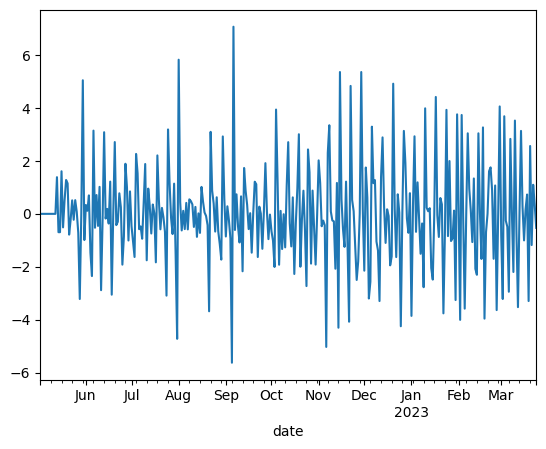

In [ ]:

# df['new_case'] =np.log(df['new_case'])
df['new_case'] =df['new_case']- df['new_case'].shift(1)
df['new_case'].dropna().plot()
df.isnull().values.any()
df= df.dropna(how ='all')


In [ ]:
result=adfuller (df['new_case'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is non- Stationary")

Test Statistic: -4.488638
p-value: 0.000206
Critical values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary


In KPSS , 


*   NULL hypothesis-> series is stationary
*   Alternate hypothesis-> series is non- stationary.


 If p value is less than 0.05 implies Non-stationary.otherwise Stationary.

In [ ]:

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

In [ ]:
kpss_test(df)

Results of KPSS Test:
Test Statistic            0.25987
p-value                   0.10000
Lags Used                80.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


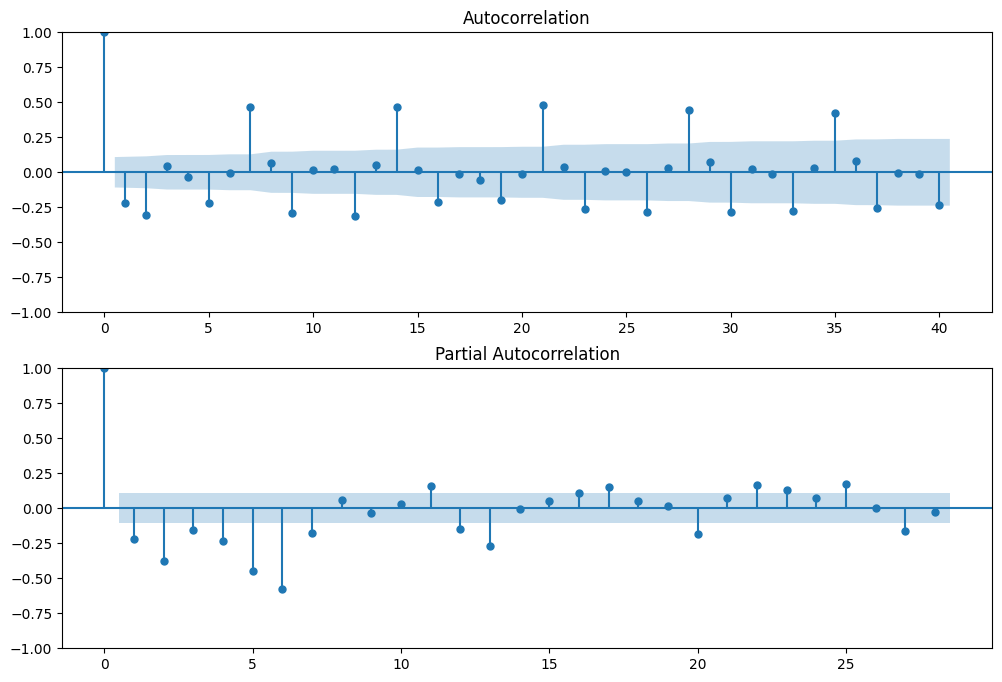

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['new_case'].iloc[2:],lags=40,ax=ax1)
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['new_case'].iloc[2:],lags=28,ax=ax1)

In [ ]:
df

,new_case
date,
2022-05-02,0.000000
2022-05-03,0.000000
2022-05-04,0.000000
2022-05-05,0.000000
2022-05-06,0.000000
...,...
2023-03-20,2.564949
2023-03-21,-1.178655
2023-03-22,1.098612


# Split Data into Training and Testing

In [ ]:
df2 = df.copy()

In [ ]:
print(df2.shape)
train= df2.iloc[:-30]
test = df2.iloc[-30:]
print(train.shape, test.shape)

(327, 1)
(297, 1) (30, 1)


# Figure out Order for ARIMA model

In [ ]:
train.isnull().values.any()

False

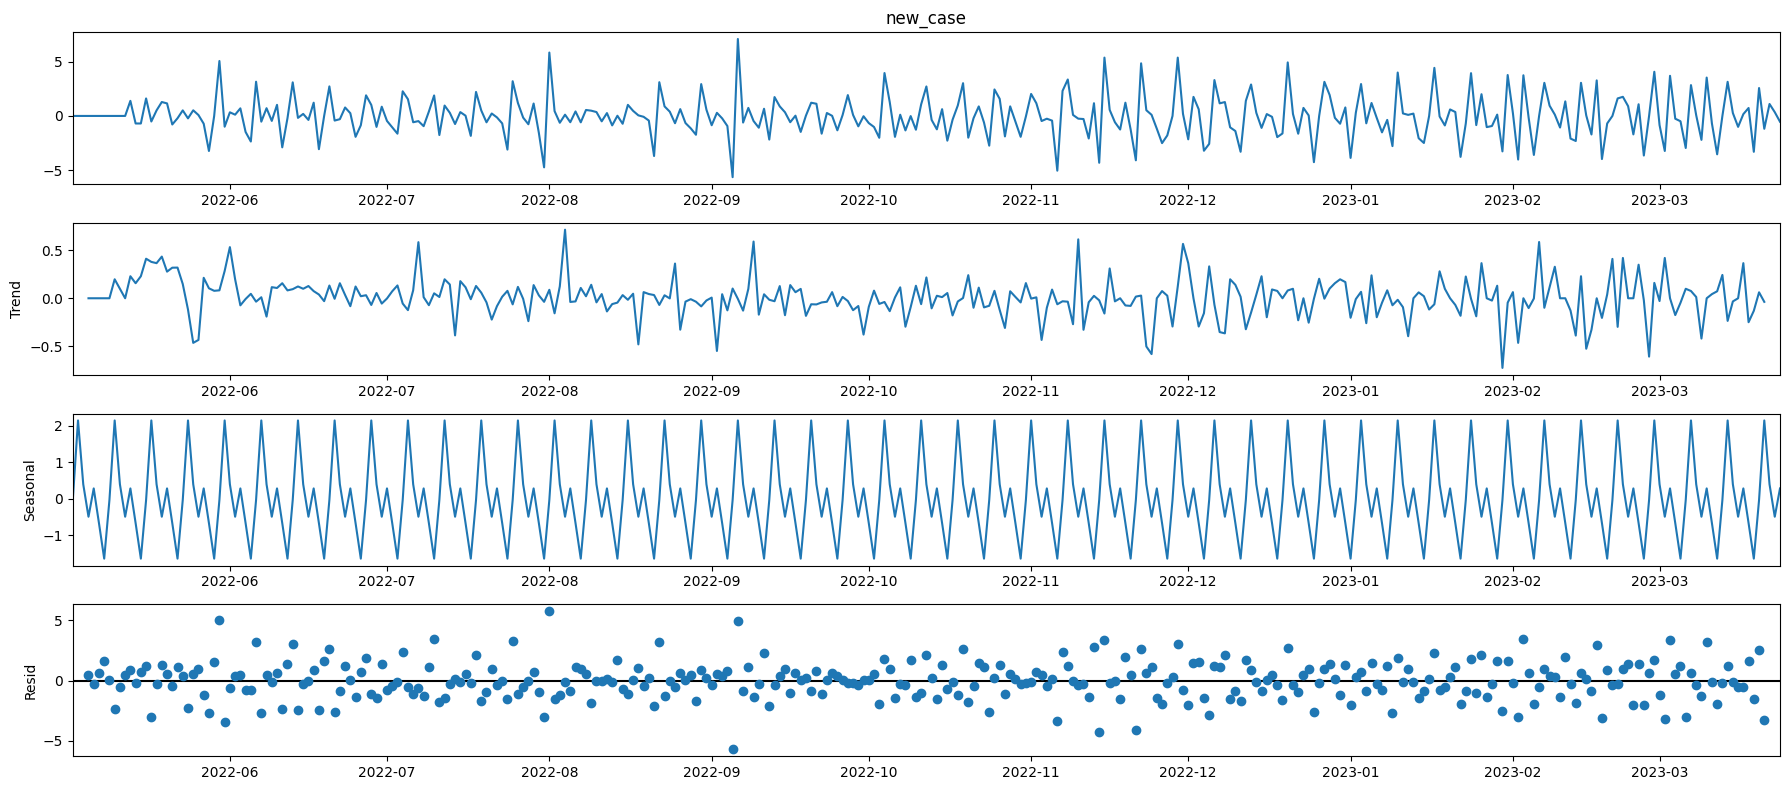

In [ ]:
rcParams['figure.figsize'] = (18, 8)

decomposition = sm.tsa.seasonal_decompose(df2['new_case'], model = 'additive',period=7)
fig = decomposition.plot()
plt.show()

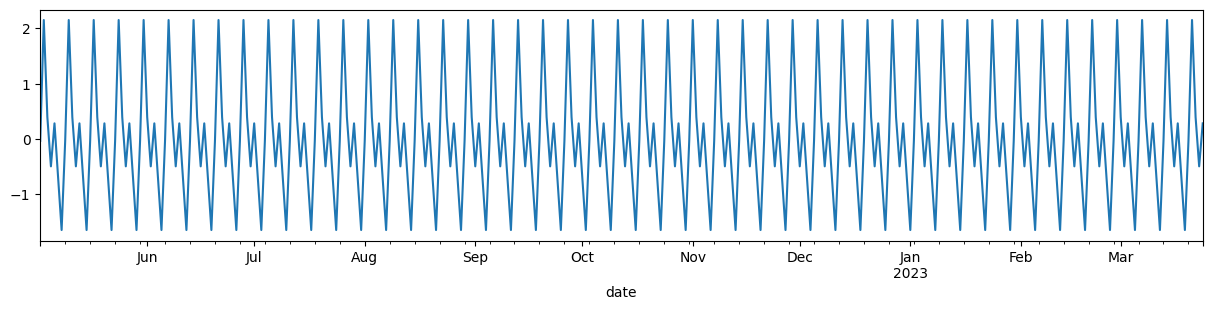

In [ ]:
plt.figure(figsize=(15,3))
decomposition.seasonal.plot()
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.6 MB/s eta 0:00:00


In [ ]:
# !pip install pmdarima

In [ ]:
stepwise_fit = auto_arima(train['new_case'], trace= True,
                         suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1065.225, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1218.243, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1207.749, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1130.859, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1216.254, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1100.610, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1093.506, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1009.075, Time=1.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1073.008, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1009.963, Time=1.10 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1073.373, Time=0.63 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, T

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  297
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -497.537
Date:                Mon, 03 Apr 2023   AIC                           1009.075
Time:                        05:05:15   BIC                           1034.931
Sample:                    05-02-2022   HQIC                          1019.426
                         - 02-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0089      0.013      0.709      0.478      -0.016       0.034
ar.L1          1.2439      0.012    104.894      0.000       1.221       1.267
ar.L2         -0.9844      0.010    -97.287      0.000      -1.004      -0.965
ma.L1         -2.0633      0.048    -43.168      0.000      -2.157      -1.970
ma.L2          1.9474      0.076     25.645      0.000       1.799       2.096
ma.L3         -0.7494      0.049    -15.225      0.000      -0.846      -0.653
sigma2         1.6672      0.114     14.659      0.000       1.444       1.890
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               106.52
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.96
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

import statsmodels.api as sm

In [ ]:
from  statsmodels.tsa.arima.model import ARIMA

# Train Model

In [ ]:
train['new_case']

date
2022-05-01    0.000000
2022-05-02    0.000000
2022-05-03    0.000000
2022-05-04    0.000000
2022-05-05    0.000000
                ...   
2023-02-18    0.693147
2023-02-19    0.000000
2023-02-20    0.000000
2023-02-21    1.609438
2023-02-22    3.367296
Name: new_case, Length: 298, dtype: float64

0,1,2 ->22 28

In [ ]:
model_arima = ARIMA(train['new_case'], order=(2,1,3))
model_arima = model_arima.fit()

In [ ]:
model_arima = ARIMA(train['new_case'], order=(2,0,3))
model_arima = model_arima.fit()

# Make Prediction on Test Set

In [ ]:
start= len(train)
end= len(train)+len(test)-1
pred_arima = model_arima.predict(start= start, end = end, type ='levels')
# print(pred)

# to have date as index
pred_arima.index = df.index[start:end+1]
print(pred_arima)

date
2023-02-23    0.298307
2023-02-24   -0.308868
2023-02-25   -1.196874
2023-02-26   -1.186001
2023-02-27   -0.286964
2023-02-28    0.828140
2023-03-01    1.328268
2023-03-02    0.842769
2023-03-03   -0.263937
2023-03-04   -1.165880
2023-03-05   -1.191984
2023-03-06   -0.325361
2023-03-07    0.786017
2023-03-08    1.313800
2023-03-09    0.866649
2023-03-10   -0.219604
2023-03-11   -1.134168
2023-03-12   -1.196473
2023-03-13   -0.362602
2023-03-14    0.743853
2023-03-15    1.298125
2023-03-16    0.889060
2023-03-17   -0.175907
2023-03-18   -1.101789
2023-03-19   -1.199490
2023-03-20   -0.398666
2023-03-21    0.701695
2023-03-22    1.281287
2023-03-23    0.910006
2023-03-24   -0.132885
Name: predicted_mean, dtype: float64


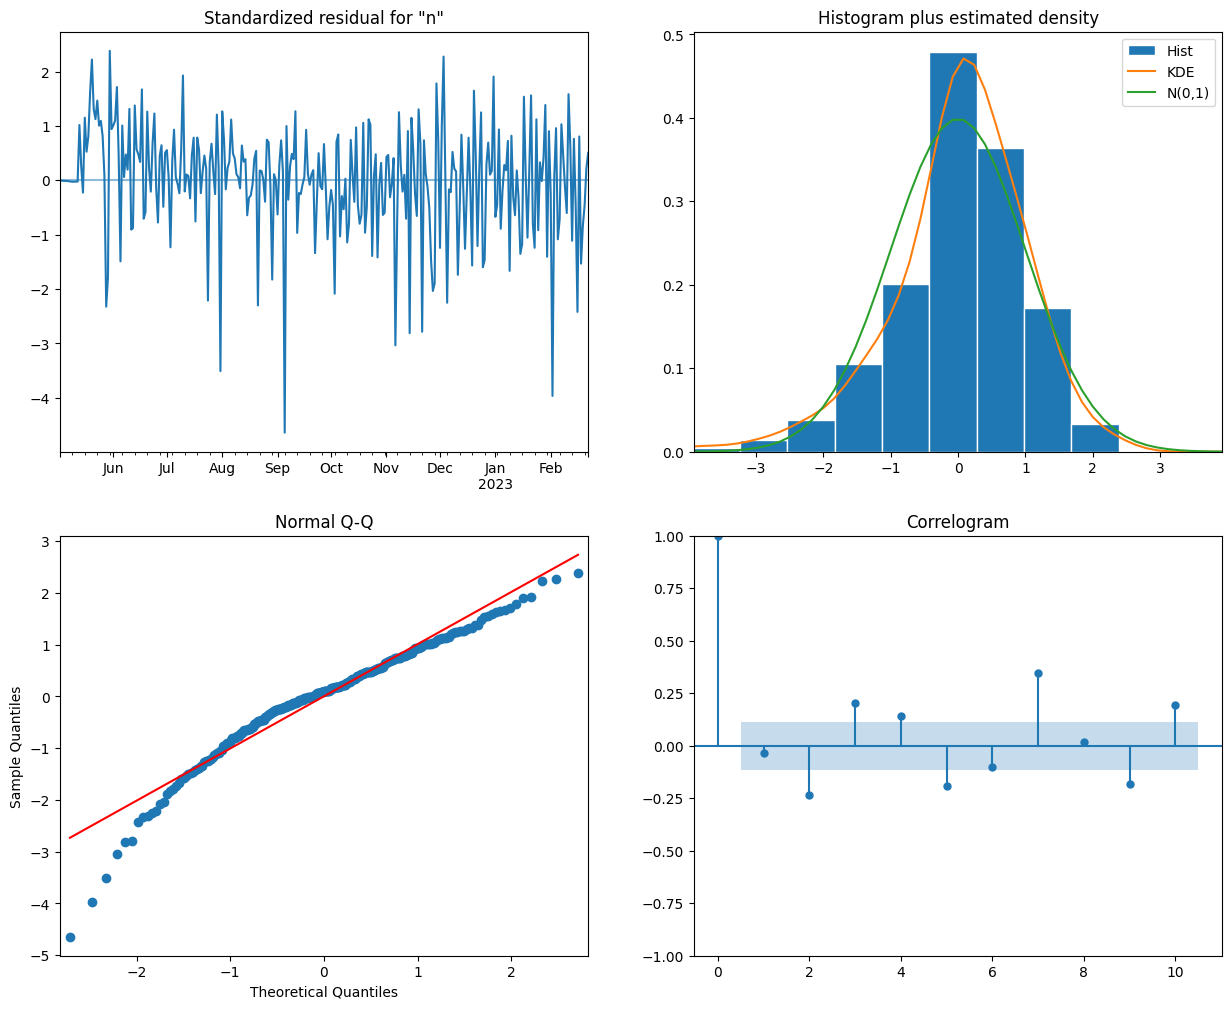

In [ ]:
model_arima.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
df3= df2.copy()

Plotting prediction and actual plot of ARIMA model

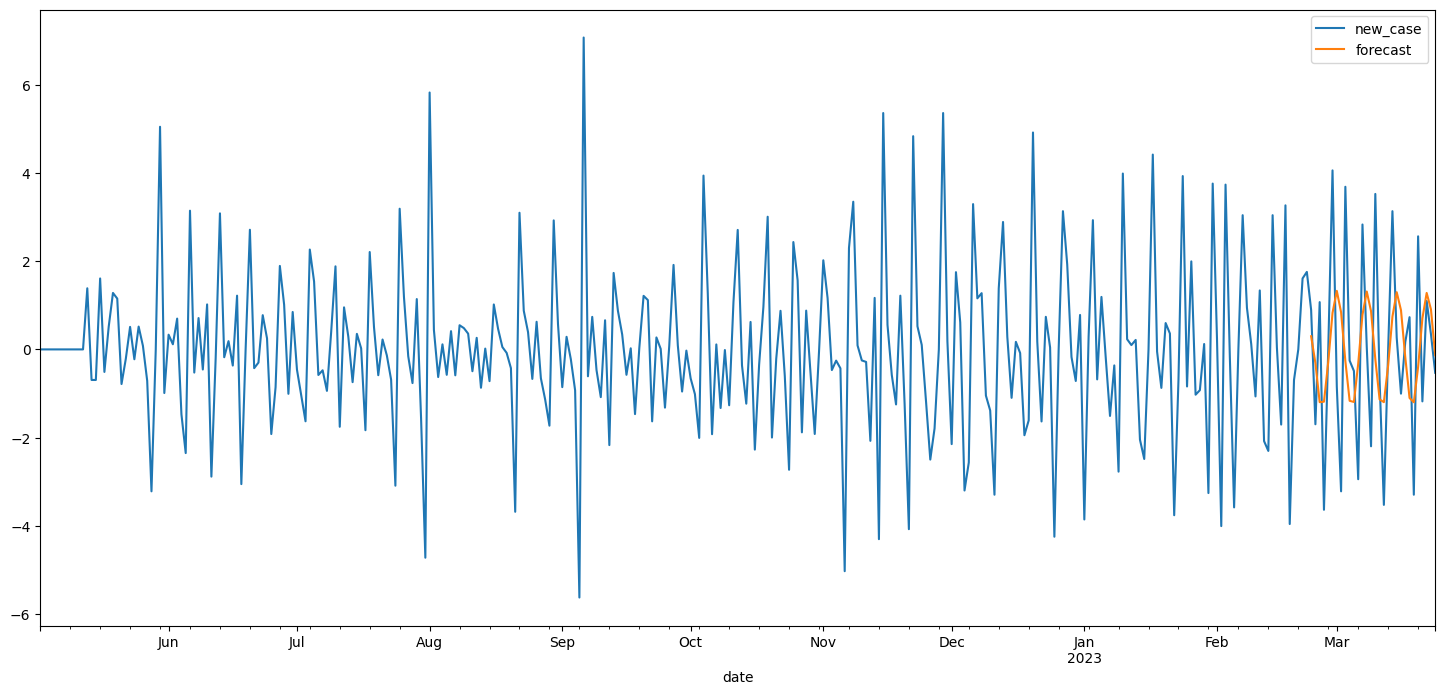

In [ ]:
start_index = test.index.min()
end_index = test.index.max()

df3['forecast']=model_arima.predict(start=start_index,end=end_index,dynamic=True)
df3[['new_case','forecast']].plot(figsize=(18,8))
plt.show()

**Performance evaluation of ARIMA model**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(pred_arima,test['new_case'])
mape = mean_absolute_percentage_error(pred_arima,test['new_case'])
rmse = np.sqrt(mean_squared_error(pred_arima,test['new_case']))

print(f'mae - : {mae}')
print(f'mape - : {mape}')
print(f'rmse - : {rmse}')


mae - : 1.7821593297705922
mape - : 3.3023637993164545
rmse - : 2.121297351613183


In [ ]:
# retrain data on entire dataset and make prediction on next 30 days

In [ ]:
model2 = ARIMA(df2, order=(2,0,3))
model2 = model2.fit()


# Future dates

In [ ]:
# index_future_dates = pd.date_range(start='2023-03-04' , end='2023-04-03')
# print(index_future_dates)

DatetimeIndex(['2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11',
               '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27',
               '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31',
               '2023-04-01', '2023-04-02', '2023-04-03'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# future_pred = model2.predict(start= len(df), end = len(df)+30, type ='levels').rename('ARIMA Predictions')
# # print(comp_pred)
# # to have date as index
# future_pred.index = index_future_dates
# print(future_pred)


2023-03-04    0.142989
2023-03-05   -0.829565
2023-03-06   -0.450302
2023-03-07    0.265508
2023-03-08    0.784726
2023-03-09    0.723088
2023-03-10    0.129572
2023-03-11   -0.552362
2023-03-12   -0.816099
2023-03-13   -0.468222
2023-03-14    0.229676
2023-03-15    0.757676
2023-03-16    0.724847
2023-03-17    0.158675
2023-03-18   -0.517668
2023-03-19   -0.801594
2023-03-20   -0.484560
2023-03-21    0.194793
2023-03-22    0.730240
2023-03-23    0.725180
2023-03-24    0.186375
2023-03-25   -0.483311
2023-03-26   -0.786117
2023-03-27   -0.499344
2023-03-28    0.160888
2023-03-29    0.702485
2023-03-30    0.724140
2023-03-31    0.212673
2023-04-01   -0.449346
2023-04-02   -0.769735
2023-04-03   -0.512607
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

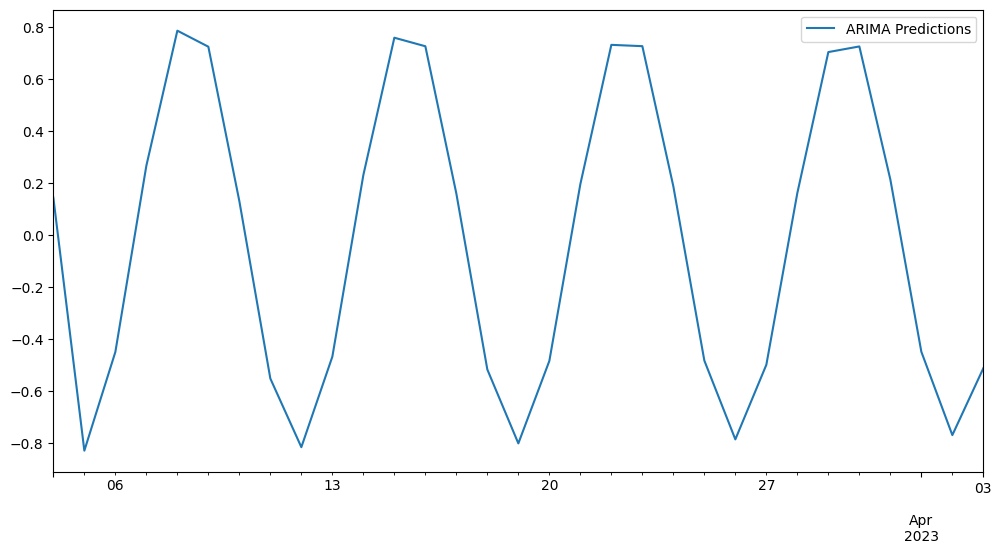

In [ ]:
# future_pred.plot(figsize=(12,6),legend= True)

pred.plot(figsize=(12,6),legend= True)

In [ ]:
sarima_model=sm.tsa.statespace.SARIMAX(train['new_case'],order=(0,1,3),seasonal_order=(0,1,3,30))

In [ ]:
sarima_model=sm.tsa.statespace.SARIMAX(train['new_case'],order=(2,0,3),seasonal_order=(2,0,3,30))

In [ ]:
sarima_model=sarima_model.fit()

In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           new_case   No. Observations:                  297
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 30)   Log Likelihood                -508.608
Date:                            Mon, 03 Apr 2023   AIC                           1039.215
Time:                                    05:10:46   BIC                           1079.847
Sample:                                05-02-2022   HQIC                          1055.482
                                     - 02-22-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1737      0.039      4.486      0.000       0.098       0.250
ar.L2          0.8222      0.039     21.195      0.000       0.746       0.898
ma.L1         -0.9856      0.032    -30.616      0.000      -1.049      -0.922
ma.L2         -0.9766      0.038    -25.878      0.000      -1.051      -0.903
ma.L3          0.9811      0.033     29.770      0.000       0.917       1.046
ar.S.L30      -0.0675      0.147     -0.460      0.645      -0.355       0.220
ar.S.L60      -0.9720      0.156     -6.246      0.000      -1.277      -0.667
ma.S.L30      -0.2726      0.217     -1.257      0.209      -0.698       0.152
ma.S.L60       0.9941      2.718      0.366      0.715      -4.332       6.321
ma.S.L90      -0.1836      0.584     -0.315      0.753      -1.327       0.960
sigma2         1.4173      3.543      0.400      0.689      -5.527       8.361
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                65.58
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

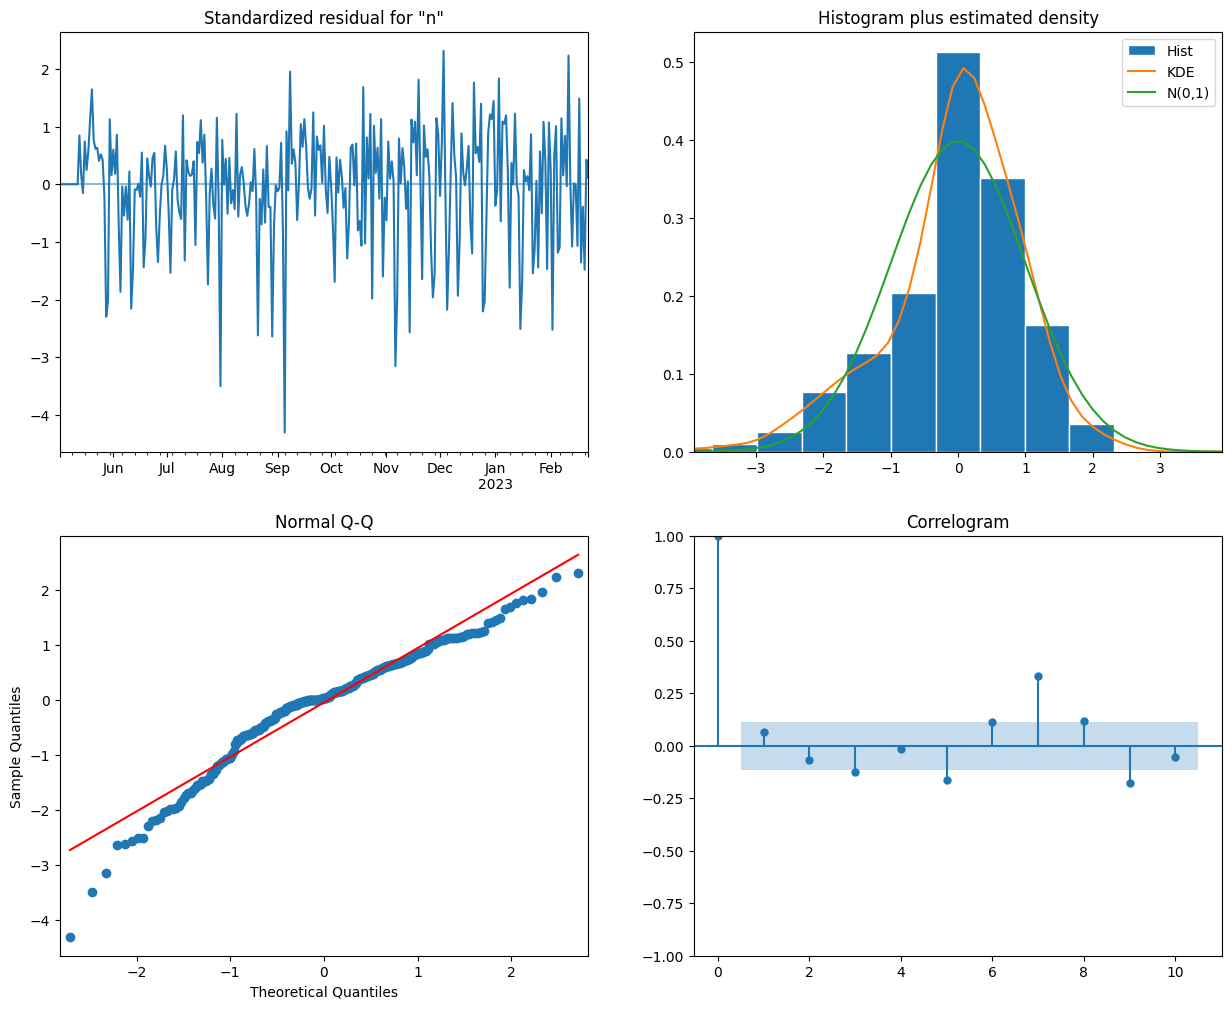

In [ ]:
sarima_model.plot_diagnostics(figsize=(15,12))
plt.show()

Prediction using SARIMA model

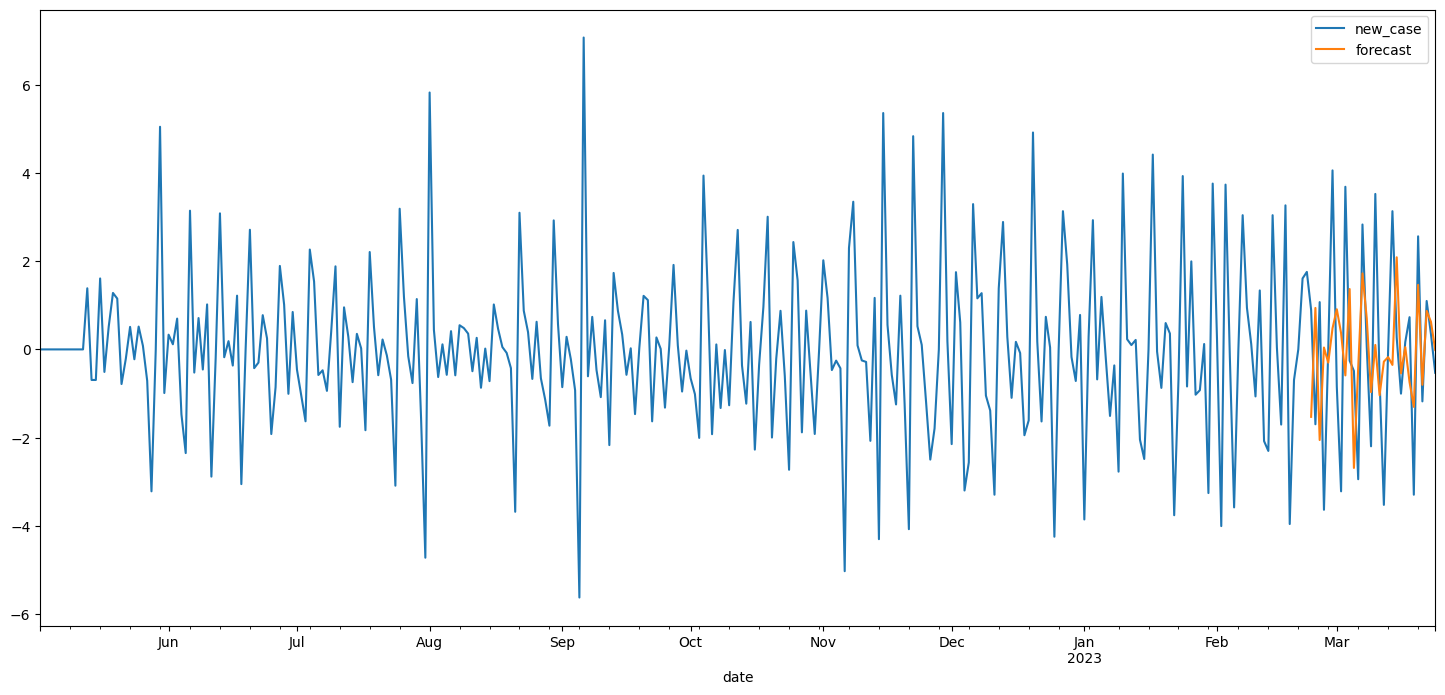

In [ ]:
start_index = test.index.min()
end_index = test.index.max()
df4= df2.copy()
df4['forecast']=sarima_model.predict(start=start_index,end=end_index,dynamic=True)
df4[['new_case','forecast']].plot(figsize=(18,8))
plt.show()

In [ ]:
pred= sarima_model.predict(start=start_index,end=end_index,dynamic=True)
print(pred)

2023-02-23   -1.529423
2023-02-24    0.940528
2023-02-25   -2.055369
2023-02-26    0.042059
2023-02-27   -0.300904
2023-02-28    0.478931
2023-03-01    0.911071
2023-03-02    0.369569
2023-03-03   -0.589612
2023-03-04    1.369610
2023-03-05   -2.688510
2023-03-06   -0.412873
2023-03-07    1.723994
2023-03-08    0.702382
2023-03-09   -0.968831
2023-03-10    0.101289
2023-03-11   -1.039020
2023-03-12   -0.276348
2023-03-13   -0.174464
2023-03-14   -0.351749
2023-03-15    2.089659
2023-03-16   -0.542559
2023-03-17    0.051256
2023-03-18   -0.742863
2023-03-19   -1.303697
2023-03-20    1.464869
2023-03-21   -0.802659
2023-03-22    0.873505
2023-03-23    0.627144
2023-03-24   -0.014217
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
test['new_case']

date
2023-02-23    4.262680
2023-02-24    2.564949
2023-02-25    3.637586
2023-02-26    0.000000
2023-02-27    0.000000
2023-02-28    4.060443
2023-03-01    3.218876
2023-03-02    0.000000
2023-03-03    3.688879
2023-03-04    3.433987
2023-03-05    2.944439
2023-03-06    0.000000
2023-03-07    2.833213
2023-03-08    2.890372
2023-03-09    0.693147
2023-03-10    4.219508
2023-03-11    3.526361
2023-03-12    0.000000
2023-03-13    0.000000
2023-03-14    3.135494
2023-03-15    3.401197
2023-03-16    2.397895
2023-03-17    2.564949
2023-03-18    3.295837
2023-03-19    0.000000
2023-03-20    2.564949
2023-03-21    1.386294
2023-03-22    2.484907
2023-03-23    2.833213
2023-03-24    2.302585
Name: new_case, dtype: float64

In [ ]:
# Errors in SARIMA model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(pred,test['new_case'])
mape = mean_absolute_percentage_error(pred,test['new_case'])
rmse = np.sqrt(mean_squared_error(pred,test['new_case']))

print(f'mae - : {mae}')
print(f'mape - : {mape}')
print(f'rmse - : {rmse}')

mae - : 1.791868645898919
mape - : 7.809780926564457
rmse - : 2.209219371429522


In [ ]:
df5= df.copy()

In [ ]:
df5.head()

,new_case
date,
2022-05-02,0.0
2022-05-03,0.0
2022-05-04,0.0
2022-05-05,0.0
2022-05-06,0.0


In [ ]:

df5['new_case_LastDay']=df['new_case'].shift(+1)
df5['new_case_2DaysBack']=df['new_case'].shift(+2)
df5['new_case_3Daysback']=df['new_case'].shift(+3)
df5

,new_case,new_case_LastDay,new_case_2DaysBack,new_case_3Daysback
date,,,,
2022-05-02,0.000000,NaN,NaN,NaN
2022-05-03,0.000000,0.000000,NaN,NaN
2022-05-04,0.000000,0.000000,0.000000,NaN
2022-05-05,0.000000,0.000000,0.000000,0.000000
2022-05-06,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2023-03-20,2.564949,-3.295837,0.730888,0.167054
2023-03-21,-1.178655,2.564949,-3.295837,0.730888
2023-03-22,1.098612,-1.178655,2.564949,-3.295837


In [ ]:
df5=df5.dropna()
df5

,new_case,new_case_LastDay,new_case_2DaysBack,new_case_3Daysback
date,,,,
2022-05-05,0.000000,0.000000,0.000000,0.000000
2022-05-06,0.000000,0.000000,0.000000,0.000000
2022-05-07,0.000000,0.000000,0.000000,0.000000
2022-05-08,0.000000,0.000000,0.000000,0.000000
2022-05-09,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2023-03-20,2.564949,-3.295837,0.730888,0.167054
2023-03-21,-1.178655,2.564949,-3.295837,0.730888
2023-03-22,1.098612,-1.178655,2.564949,-3.295837


Importing Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# random_forest_model=RandomForestRegressor(n_estimators=100, random_state=1)

In [ ]:
import numpy as np
x1,x2,x3,y=df5['new_case_LastDay'],df5['new_case_2DaysBack'],df5['new_case_3Daysback'],df5['new_case']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
# print(final_x)
     

In [ ]:

X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [ ]:
random_forest_model=RandomForestRegressor(30)
random_forest_model.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=30)

In [ ]:
predrandom_forest= random_forest_model.predict(X_test)

In [ ]:
#@title
# import matplotlib.pyplot as plt
# pred=random_forest_model.predict(X_test)
# #plotting the data

# # df5['total_cases'].plot()
# plt.rcParams["figure.figsize"] = (11,6)

# plt.plot(pred,label= 'Random_Forest_Predictions')
# plt.plot(df5['total_cases'], label='Actual cases')
# plt.legend(loc="upper left")
# plt.show()
# df4[['y_test',pred]].plot(figsize=(18,8))
# plt.show()

Plotting prediction using Random Forest

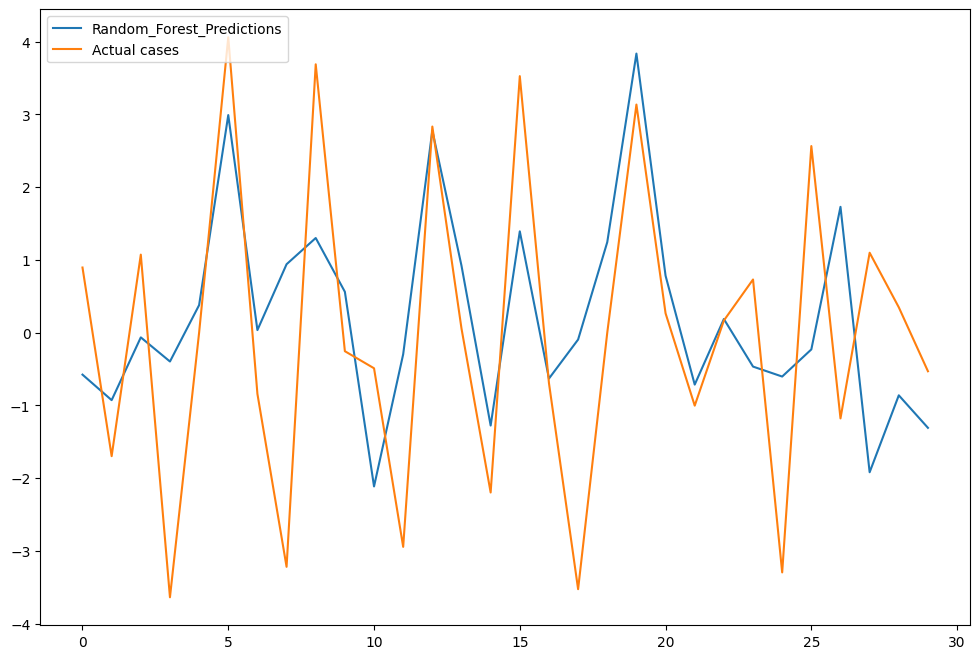

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predrandom_forest,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual cases')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Errors in Random Forest model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(predrandom_forest,y_test)
mape = mean_absolute_percentage_error(predrandom_forest,y_test)
rmse = np.sqrt(mean_squared_error(predrandom_forest,y_test))

print(f'mae - : {mae}')
print(f'mape - : {mape}')
print(f'rmse - : {rmse}')

mae - : 1.513946686601136
mape - : 4.633435144036415
rmse - : 1.8830906113340111


Importing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:

# model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

Predicting using Linear Regression

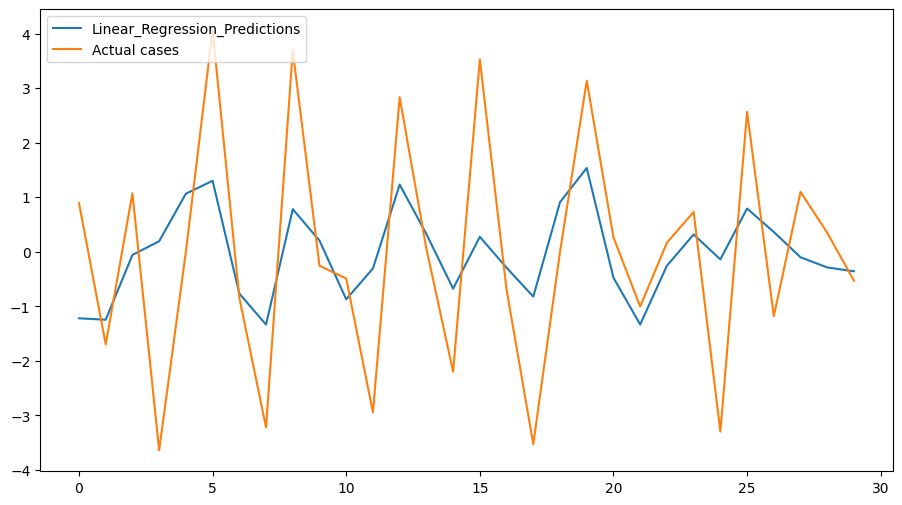

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual cases')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Errors in Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(lin_pred,y_test)
mape = mean_absolute_percentage_error(lin_pred,y_test)
rmse = np.sqrt(mean_squared_error(lin_pred,y_test))

print(f'mae - : {mae}')
print(f'mape - : {mape}')
print(f'rmse - : {rmse}')

mae - : 1.411492208186025
mape - : 4.422965576749307
rmse - : 1.7650310503691684


Installing Fbprophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826610 sha256=3a832e62f492c7bc7311a4f7be453580e9dec01b85ce9b4ba21dfc05f85541d8
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9435972 sha256=29733a7456ce4a0bffdbe3cb3525f8217f7ab40967e778ec7ecd79ff8ccf985d
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
df_new= df2.copy()

In [ ]:
df_new.reset_index(inplace=True)

In [ ]:
df_new

,date,new_case
0,2022-05-02,0.000000
1,2022-05-03,0.000000
2,2022-05-04,0.000000
3,2022-05-05,0.000000
4,2022-05-06,0.000000
...,...,...
322,2023-03-20,2.564949
323,2023-03-21,-1.178655
324,2023-03-22,1.098612
325,2023-03-23,0.348307


In [ ]:
df_6 =df_new.copy()

In [ ]:
df_6

,date,new_case
0,2022-05-02,0.000000
1,2022-05-03,0.000000
2,2022-05-04,0.000000
3,2022-05-05,0.000000
4,2022-05-06,0.000000
...,...,...
322,2023-03-20,2.564949
323,2023-03-21,-1.178655
324,2023-03-22,1.098612
325,2023-03-23,0.348307


In [ ]:
df_6.columns = ['ds','y']



In [ ]:
df_6

,ds,y
0,2022-05-02,0.000000
1,2022-05-03,0.000000
2,2022-05-04,0.000000
3,2022-05-05,0.000000
4,2022-05-06,0.000000
...,...,...
322,2023-03-20,2.564949
323,2023-03-21,-1.178655
324,2023-03-22,1.098612
325,2023-03-23,0.348307


In [ ]:

df_6['ds'] = pd.to_datetime(df_6['ds'])

     
# from google.colab import data_table


# data_table.enable_dataframe_formatter()
df_6


,ds,y
0,2022-05-02,0.000000
1,2022-05-03,0.000000
2,2022-05-04,0.000000
3,2022-05-05,0.000000
4,2022-05-06,0.000000
...,...,...
322,2023-03-20,2.564949
323,2023-03-21,-1.178655
324,2023-03-22,1.098612
325,2023-03-23,0.348307


Plotting the dataset

<Axes: xlabel='ds'>

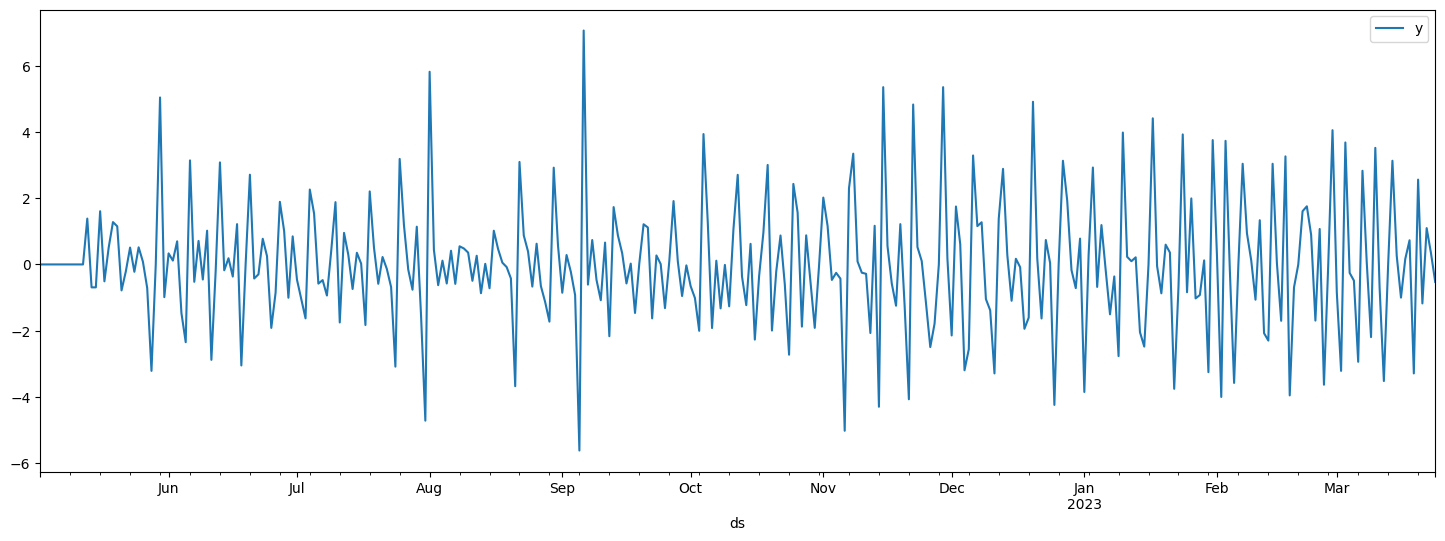

In [ ]:

df_6.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
print(df_6.shape)
train= df_6.iloc[:-30]
test = df_6.iloc[-30:]
print(train.shape, test.shape)

(327, 2)
(297, 2) (30, 2)


In [ ]:
# define the model
model_prophet = Prophet()
# fit the model
model_prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:

future = model_prophet.make_future_dataframe(periods=30) #MS for monthly, H for hourly
forecast = model_prophet.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
322,2023-03-20,-0.052078,-1.855748,1.821283,-0.052111,-0.052050,-0.020341,-0.020341,-0.020341,-0.020341,-0.020341,-0.020341,0.0,0.0,0.0,-0.072419
323,2023-03-21,-0.052367,-0.088570,4.012816,-0.052403,-0.052337,2.094021,2.094021,2.094021,2.094021,2.094021,2.094021,0.0,0.0,0.0,2.041654
324,2023-03-22,-0.052656,-1.379505,2.368215,-0.052694,-0.052623,0.435392,0.435392,0.435392,0.435392,0.435392,0.435392,0.0,0.0,0.0,0.382737
325,2023-03-23,-0.052944,-2.487450,1.473461,-0.052985,-0.052910,-0.410897,-0.410897,-0.410897,-0.410897,-0.410897,-0.410897,0.0,0.0,0.0,-0.463842
326,2023-03-24,-0.053233,-1.870682,2.091781,-0.053275,-0.053197,0.180782,0.180782,0.180782,0.180782,0.180782,0.180782,0.0,0.0,0.0,0.127549


In [ ]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
322,2023-03-20,-0.072419,-1.855748,1.821283
323,2023-03-21,2.041654,-0.088570,4.012816
324,2023-03-22,0.382737,-1.379505,2.368215
325,2023-03-23,-0.463842,-2.487450,1.473461
326,2023-03-24,0.127549,-1.870682,2.091781


In [ ]:

test.tail()

,ds,y
322,2023-03-20,2.564949
323,2023-03-21,-1.178655
324,2023-03-22,1.098612
325,2023-03-23,0.348307
326,2023-03-24,-0.530628


Plotting using Fbprophet

In [ ]:
plot_plotly(model_prophet ,forecast)

In [ ]:

prophet_predictions = forecast.iloc[-30:]['yhat']

In [ ]:
# Errors in fbprophet model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(prophet_predictions,test['y'])
mape = mean_absolute_percentage_error(prophet_predictions,test['y'])
rmse = np.sqrt(mean_squared_error(prophet_predictions,test['y']))

print(f'mae - : {mae}')
print(f'mape - : {mape}')
print(f'rmse - : {rmse}')

mae - : 1.4232643376165997
mape - : 6.220602512046925
rmse - : 1.763563534948237


In [ ]:
# test_Y = test.iloc[-30:]['y']
print(test['y'])
print(prophet_predictions)

297    0.895384
298   -1.697731
299    1.072637
300   -3.637586
301    0.000000
302    4.060443
303   -0.841567
304   -3.218876
305    3.688879
306   -0.254892
307   -0.489548
308   -2.944439
309    2.833213
310    0.057158
311   -2.197225
312    3.526361
313   -0.693147
314   -3.526361
315    0.000000
316    3.135494
317    0.265703
318   -1.003302
319    0.167054
320    0.730888
321   -3.295837
322    2.564949
323   -1.178655
324    1.098612
325    0.348307
326   -0.530628
Name: y, dtype: float64
297   -0.455757
298    0.135633
299   -0.794764
300   -1.575357
301   -0.066355
302    2.047718
303    0.388800
304   -0.457778
305    0.133612
306   -0.796785
307   -1.577379
308   -0.068377
309    2.045697
310    0.386779
311   -0.459799
312    0.131591
313   -0.798806
314   -1.579400
315   -0.070398
316    2.043676
317    0.384758
318   -0.461820
319    0.129570
320   -0.800827
321   -1.581421
322   -0.072419
323    2.041654
324    0.382737
325   -0.463842
326    0.127549
Name: yhat, dtyp

Forecasting using LSTM


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
     

In [ ]:
df

,new_case
date,
2022-05-02,0.000000
2022-05-03,0.000000
2022-05-04,0.000000
2022-05-05,0.000000
2022-05-06,0.000000
...,...
2023-03-20,2.564949
2023-03-21,-1.178655
2023-03-22,1.098612


In [ ]:
df_dl= df.copy()
# df_dl = pd.read_csv('/content/drive/MyDrive/timeseries_dataset/dailycases.csv')

In [ ]:
# #preprocessing
# df_dl.timestamp = pd.to_datetime(df_dl['date'], format='%d-%m-%Y')
# df_dl.index = df_dl.timestamp
# df_dl.drop('date',axis = 1, inplace = True)
# df_dl['new_case'] =np.log(df_dl['new_case'])
# df_dl['new_case']=df_dl['new_case'].dropna()
# #looking at the first few rows
df_dl.head()
print(df_dl.shape)
train= df_dl.iloc[:-30]
test = df_dl.iloc[-30:]
print(train.shape, test.shape)

(327, 1)
(297, 1) (30, 1)


In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914],
       [0.44305914]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:

# define generator
n_input = 9
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:

X,y = generator[4]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
     

Given the Array: 
[0.44305914 0.44305914 0.44305914 0.44305914 0.44305914 0.44305914
 0.44305914 0.55220124 0.38848809]
Predict this y: 
 [[0.38848809]]


In [ ]:
X.shape

(1, 9, 1)

In [ ]:


generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.regularizers import l2

In [ ]:
model_lstm = Sequential()

model_lstm.add((LSTM(64, activation='relu', input_shape=(n_input, n_features),kernel_regularizer=l2(0.01))))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(1, 'relu'))



In [ ]:
model_lstm.compile(optimizer='adam', loss='mae')

In [ ]:

# fit model
model_lstm.fit(generator,epochs=5)

Epoch 1/5
288/288 [==============================] - 4s 6ms/step - loss: 0.1987
Epoch 2/5
288/288 [==============================] - 2s 8ms/step - loss: 0.1259
Epoch 3/5
288/288 [==============================] - 2s 8ms/step - loss: 0.1222
Epoch 4/5
288/288 [==============================] - 2s 6ms/step - loss: 0.1159
Epoch 5/5
288/288 [==============================] - 2s 6ms/step - loss: 0.1176


In [ ]:

model_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


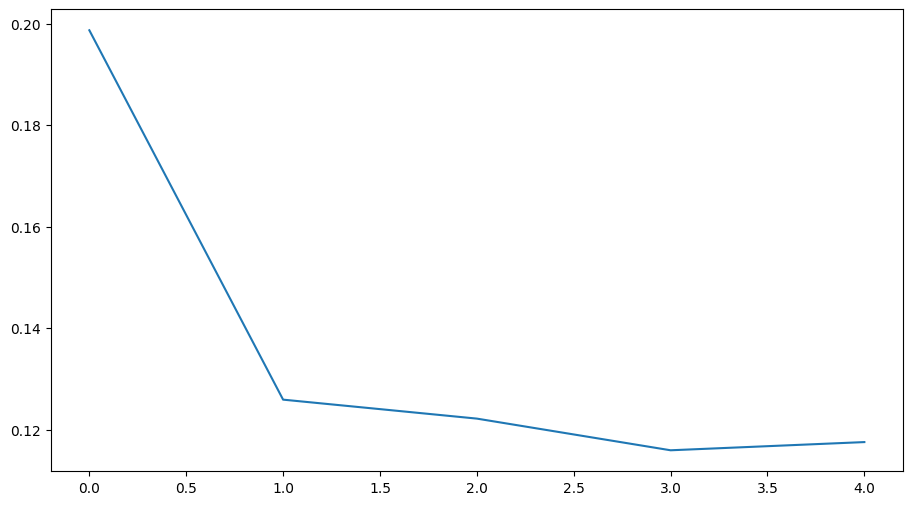

In [ ]:

loss_per_epoch = model_lstm.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-n_input:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

Prediction using LSTM

In [ ]:

model_lstm.predict(last_train_batch)

1/1 [==============================] - 0s 199ms/step


array([[0.4337247]], dtype=float32)

In [ ]:

scaled_test[0]

array([0.51355218])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model_lstm.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

1/1 [==============================] - 0s 23ms/step


In [ ]:
test_predictions

[array([0.4337247], dtype=float32),
 array([0.43066686], dtype=float32),
 array([0.43040425], dtype=float32),
 array([0.43170327], dtype=float32),
 array([0.42819428], dtype=float32),
 array([0.43179744], dtype=float32),
 array([0.43177032], dtype=float32),
 array([0.4310586], dtype=float32),
 array([0.42891765], dtype=float32),
 array([0.4268431], dtype=float32),
 array([0.42670614], dtype=float32),
 array([0.42660624], dtype=float32),
 array([0.4265107], dtype=float32),
 array([0.42640507], dtype=float32),
 array([0.42634487], dtype=float32),
 array([0.42624426], dtype=float32),
 array([0.42615134], dtype=float32),
 array([0.4260751], dtype=float32),
 array([0.42603123], dtype=float32),
 array([0.42601526], dtype=float32),
 array([0.4260018], dtype=float32),
 array([0.4259904], dtype=float32),
 array([0.4259808], dtype=float32),
 array([0.42597318], dtype=float32),
 array([0.42596686], dtype=float32),
 array([0.4259622], dtype=float32),
 array([0.425959], dtype=float32),
 array([0.42

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.head

<bound method NDFrame.head of             new_case  Predictions
date                             
2023-02-23  0.895384    -0.118564
2023-02-24 -1.697731    -0.157403
2023-02-25  1.072637    -0.160739
2023-02-26 -3.637586    -0.144239
2023-02-27  0.000000    -0.188810
2023-02-28  4.060443    -0.143043
2023-03-01 -0.841567    -0.143388
2023-03-02 -3.218876    -0.152428
2023-03-03  3.688879    -0.179622
2023-03-04 -0.254892    -0.205972
2023-03-05 -0.489548    -0.207712
2023-03-06 -2.944439    -0.208980
2023-03-07  2.833213    -0.210194
2023-03-08  0.057158    -0.211536
2023-03-09 -2.197225    -0.212300
2023-03-10  3.526361    -0.213578
2023-03-11 -0.693147    -0.214759
2023-03-12 -3.526361    -0.215727
2023-03-13  0.000000    -0.216284
2023-03-14  3.135494    -0.216487
2023-03-15  0.265703    -0.216658
2023-03-16 -1.003302    -0.216803
2023-03-17  0.167054    -0.216925
2023-03-18  0.730888    -0.217021
2023-03-19 -3.295837    -0.217102
2023-03-20  2.564949    -0.217161
2023-03-21 -1.1786

Plotting graph of prediction using LSTM

<Axes: xlabel='date'>

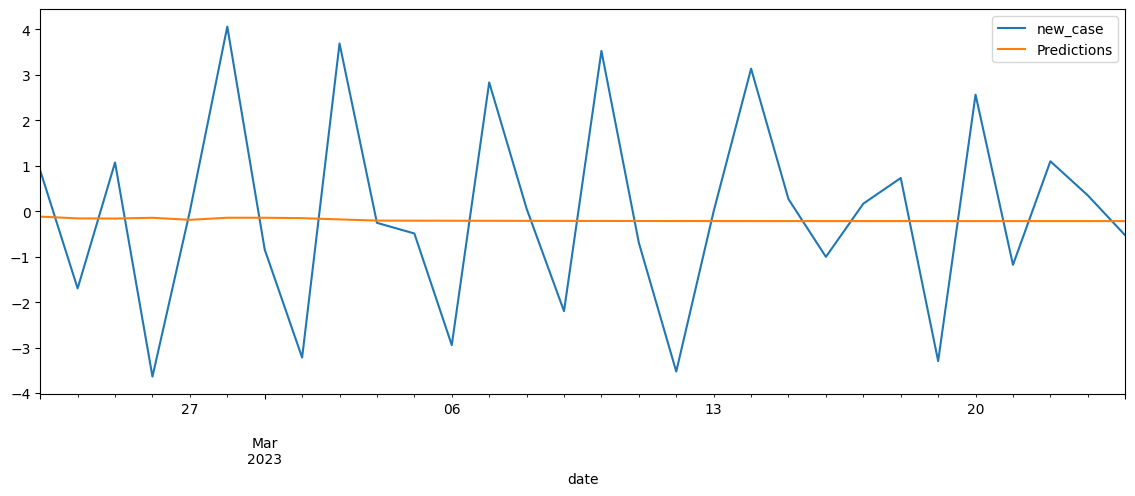

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
test

,new_case,Predictions
date,,
2023-02-23,0.895384,-0.118564
2023-02-24,-1.697731,-0.157403
2023-02-25,1.072637,-0.160739
2023-02-26,-3.637586,-0.144239
2023-02-27,0.000000,-0.188810
2023-02-28,4.060443,-0.143043
2023-03-01,-0.841567,-0.143388
2023-03-02,-3.218876,-0.152428
2023-03-03,3.688879,-0.179622


In [ ]:
# Errors in LSTM model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test['Predictions'],test['new_case'])
mape = mean_absolute_percentage_error(test['Predictions'],test['new_case'])
rmse = np.sqrt(mean_squared_error(test['Predictions'],test['new_case']))

print(f'mae - : {mae}')
print(f'mape - : {mape}')
print(f'rmse - : {rmse}')

mae - : 1.6794898821185218
mape - : 9.066827609988222
rmse - : 2.1538639097161894
